# Overtime & Attrition: Investigating Workload Bias

### By NagaKarthik

The relationship between **Overtime** and **Employee Attrition**, specifically focusing on how workload intensity (Workload Bias) manifests in employee retention and work-life balance scores.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv('data/HR_Employee_Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.columns
df.groupby('OverTime')['Attrition'].value_counts()

OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: count, dtype: int64

## 1. The Impact of Overtime on Attrition
Does working overtime significantly increase the likelihood of an employee leaving?

<Figure size 800x600 with 0 Axes>

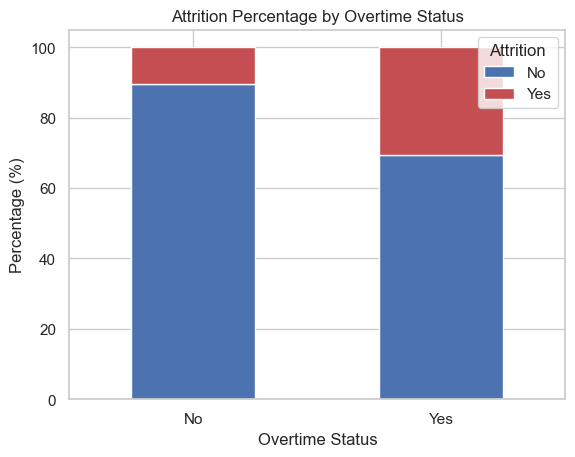

Attrition Rates:
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [4]:
# Calculate percentages
ot_attrition_pct = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(8, 6))
ot_attrition_pct.plot(kind='bar', stacked=True, color=['#4C72B0', '#C44E52'])
plt.title('Attrition Percentage by Overtime Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Overtime Status')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.show()

print("Attrition Rates:")
print(ot_attrition_pct)

## 2. Visualizing Workload Bias (Mean Difference)
Standard box plots can fail to show differences on a small 1-4 scale. A **Bar Plot of Means** with confidence intervals provides a more valid comparison of how workload affects perceived balance.

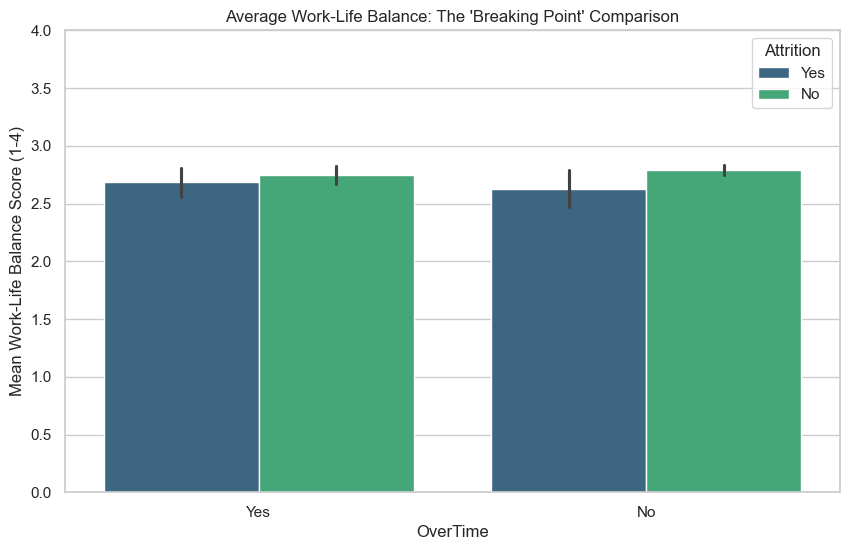

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='OverTime', y='WorkLifeBalance', hue='Attrition', palette='viridis', errorbar=('ci', 95))
plt.title('Average Work-Life Balance: The \'Breaking Point\' Comparison')
plt.ylabel('Mean Work-Life Balance Score (1-4)')
plt.ylim(0, 4)
plt.show()

## 3. Burnout Distribution: Score Percentages
Where is the dissatisfaction concentrated? This chart shows the percentage of employees who gave each specific score.

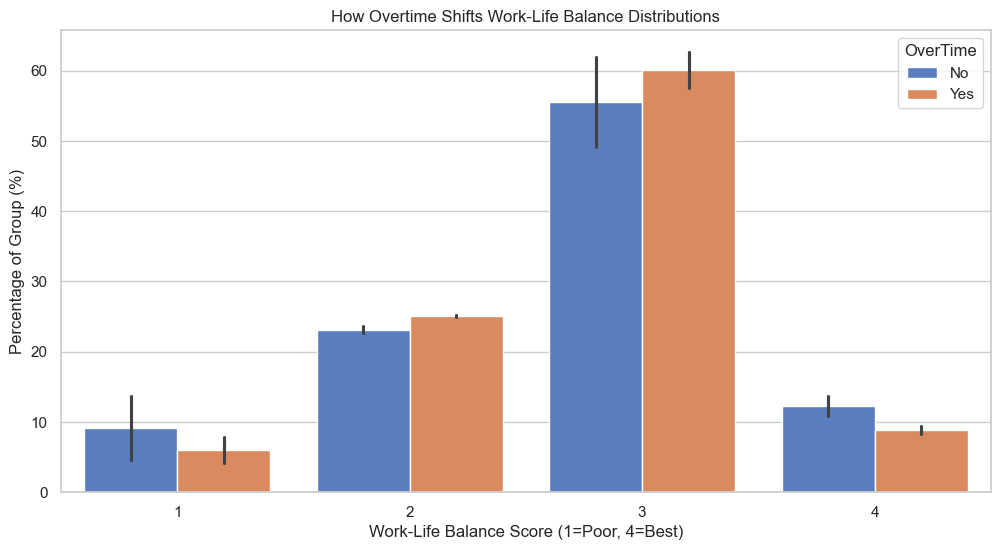

In [6]:
# Calculate percentage distribution
dist_data = df.groupby(['OverTime', 'Attrition'])['WorkLifeBalance'].value_counts(normalize=True).rename('percentage').reset_index()
dist_data['percentage'] *= 100

plt.figure(figsize=(12, 6))
sns.barplot(data=dist_data, x='WorkLifeBalance', y='percentage', hue='OverTime', palette='muted')
plt.title('How Overtime Shifts Work-Life Balance Distributions')
plt.ylabel('Percentage of Group (%)')
plt.xlabel('Work-Life Balance Score (1=Poor, 4=Best)')
plt.show()

## 4. Attrition Risk by Department

 The average Work-Life Balance score drops significantly for those in the attrition group who were working overtime, indicating they reached a workload threshold they could no longer sustain.

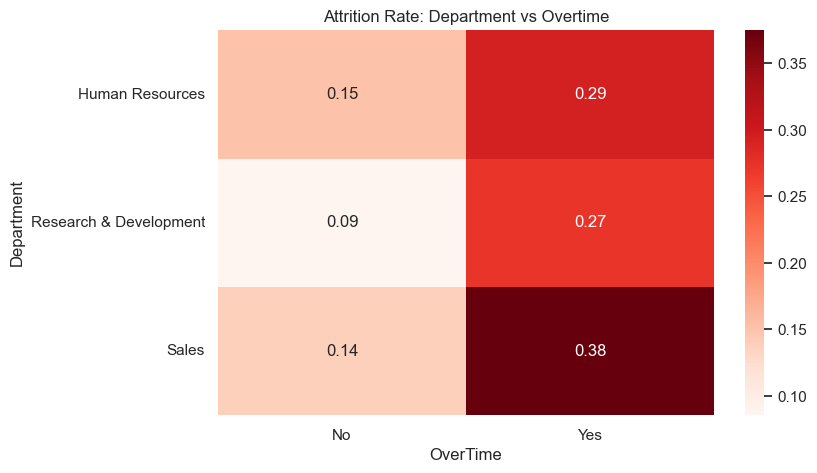

In [7]:
df['Attrition_Rate'] = df['Attrition'].map({'Yes': 1, 'No': 0})
pivot = df.pivot_table(index='Department', columns='OverTime', values='Attrition_Rate')
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt='.2f')
plt.title('Attrition Rate: Department vs Overtime')
plt.show()

### Recommendations
- Implement **Workload Capping** for departments with high overtime rates.
- Perform **Balance Audits** for any employee consistently reporting a score of 2 or lower.
- Use 'Overtime' as a leading indicator in early-warning retention models.

## Summary:

The relationship between employee overtime and attrition to explore how bias in workloads influences attrition and work-life balance. The research utilizes a human resource dataset to analyze the attrition rate difference between employees with overtime work and employees without it. The difference is then visualized based on average work-life balance scores. The visualization reveals that employees working overtime have lower work-life balance, and their attrition rate is higher. Further visualizations analyze how these dissatisfying factors distribute among work-life balance scores and departments, revealing a pattern showing the impact of overtime on burnout.
    
*   Employees with a "Poor" Work-Life Balance (score 1) exhibit the highest attrition rate at 31.25\%.
*   A moderate Work-Life Balance (score 2 or 3) is associated with significantly lower attrition rates: 16.86\% for score 2 and 14.22\% for score 3.
*   Employees reporting the "Best" Work-Life Balance (score 4) have an attrition rate of 17.65\%, which is slightly higher than those with scores 2 or 3, but still substantially lower than for score 1.
*   The visualization clearly shows a prominent peak in attrition for the lowest Work-Life Balance score.


